In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# IMPORTING THE DATA
**The aim is to find loopholes in the for-profit business by conducting exploratory data analysis using Python libraries**

In [ ]:
data= pd.read_csv('../input/tsf-datasets/SampleSuperstore.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# INSPECTING AND CLEANING THE DATA FOR FURTHER WORK  

In [ ]:
data.head(10)

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.notnull().sum()

In [ ]:
data.duplicated().sum()


In [ ]:
data.drop_duplicates(inplace=True)

*There are no more duplicated or null values, so we donot need any more edits or data refining*

In [ ]:
data.tail()

In [ ]:
data.info()

**DATA IS SUCCESSFULLY REFINED**

# EXPLORATORY DATA ANALYSIS

### Total Sales and Profits

In [ ]:

Sales_Profits= data.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_Profits,2) 

### Finding Regionwise Profits

In [ ]:
data.groupby(['Region'], as_index = False, sort = True)['Profit'].mean()

In [ ]:
region = ['Central', 'East', 'South', 'West']
profit = [17.093, 32.135, 28.858, 33.849]
plt.pie(profit, labels = region,)
plt.title('Average profit for Different regions')

The central region is not making much profits

### Finding the Top 20 States by Sales

In [ ]:
Top_20_Sales = data.groupby("State").Sales.sum().nlargest(n =20)
Top_20_Sales.index

In [ ]:
plt.style.use('dark_background')
Top_20_Sales.plot(kind ='bar', figsize =(10,5))
plt.xlabel("States")
plt.ylabel("Sales")
plt.title("Top 20 States by Sales")
plt.show()

In [ ]:
Top_20_Profits = data.groupby("State").Profit.sum().nlargest(n =20)
Top_20_Profits.index

In [ ]:
plt.style.use('dark_background')
Top_20_Profits.plot(kind ='bar', figsize =(10,5))
plt.xlabel("Profits")
plt.ylabel("Sales")
plt.title("Top 20 States by Profits")
plt.show()

In [ ]:
print("Despite having much less sales, New York is nearly catching up with California in terms of gains")

In [ ]:
Loss = data.groupby("State").Profit.sum().nsmallest(n =20)
Loss.index

In [ ]:
plt.style.use('dark_background')
Loss.plot(kind ='bar', figsize =(10,5))
plt.xlabel("Profits")
plt.ylabel("Sales")
plt.title("Bottom 20 States by Profits")
plt.show()

In [ ]:
BadSales = data.groupby("State").Sales.sum().nsmallest(n =20)
BadSales.index

In [ ]:
plt.style.use('dark_background')
BadSales.plot(kind ='bar', figsize =(10,5))
plt.xlabel("Profits")
plt.ylabel("Sales")
plt.title("Bottom 20 States by Profits")
plt.show()

In [ ]:
data.groupby(['City', 'State'], as_index = False, sort = True)['Profit'].sum().agg([np.min])

In [ ]:
data.groupby(['City', 'State'], as_index = False, sort = True)['Profit'].sum().agg([np.max])

### Co-relating all four external factors

In [ ]:
compare=data.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(compare)


In [ ]:
correlation=compare.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,cmap='inferno',annot=True)

In [ ]:
plt.figure(figsize=[12,8])
sns.boxplot(x="variable", y="value", data=pd.melt(compare), width=1)
plt.show()

In [ ]:
for col in data.columns:
    if data[col].dtype=='object':
        print("Number of unique entries in",col + " are",data[col].nunique())


### Finding Sales and Profits by Category

In [ ]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=data, palette="Blues_d")

In [ ]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=data, palette="Blues_d")

#### From the analysis, we infer that technology sales are the most prospective sources for the retail company for profits. However, selling furnitures is not a very profitable venture as the sales vs profit ratios make it rather evident to us from the two charts above.

In [ ]:
sns.regplot(data['Sales'],data['Profit'])

More or less, Profits and sales are directly proportional

In [ ]:

plt.figure(figsize = (10,10))
data['Sub-Category'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )
plt.show()

**WE INFER THESE**
1. The office supplies are sold the most(like paper and binder)
2. Technological equipments are sold in smaller numbers, but nonetheless are vastly profitable

### Discount v/s Profits and Sales Analysis

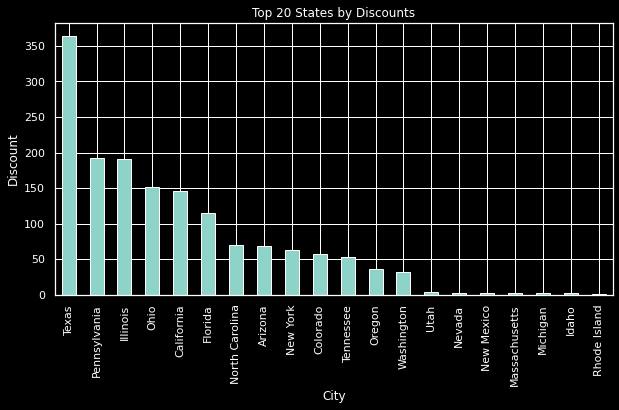

In [85]:
Top_20_Discounts = data.groupby("State").Discount.sum().nlargest(n =20)
Top_20_Discounts.index
plt.style.use('dark_background')
Top_20_Discounts.plot(kind ='bar', figsize =(10,5))
plt.xlabel("City")
plt.ylabel("Discount")
plt.title("Top 20 States by Discounts")
plt.show()

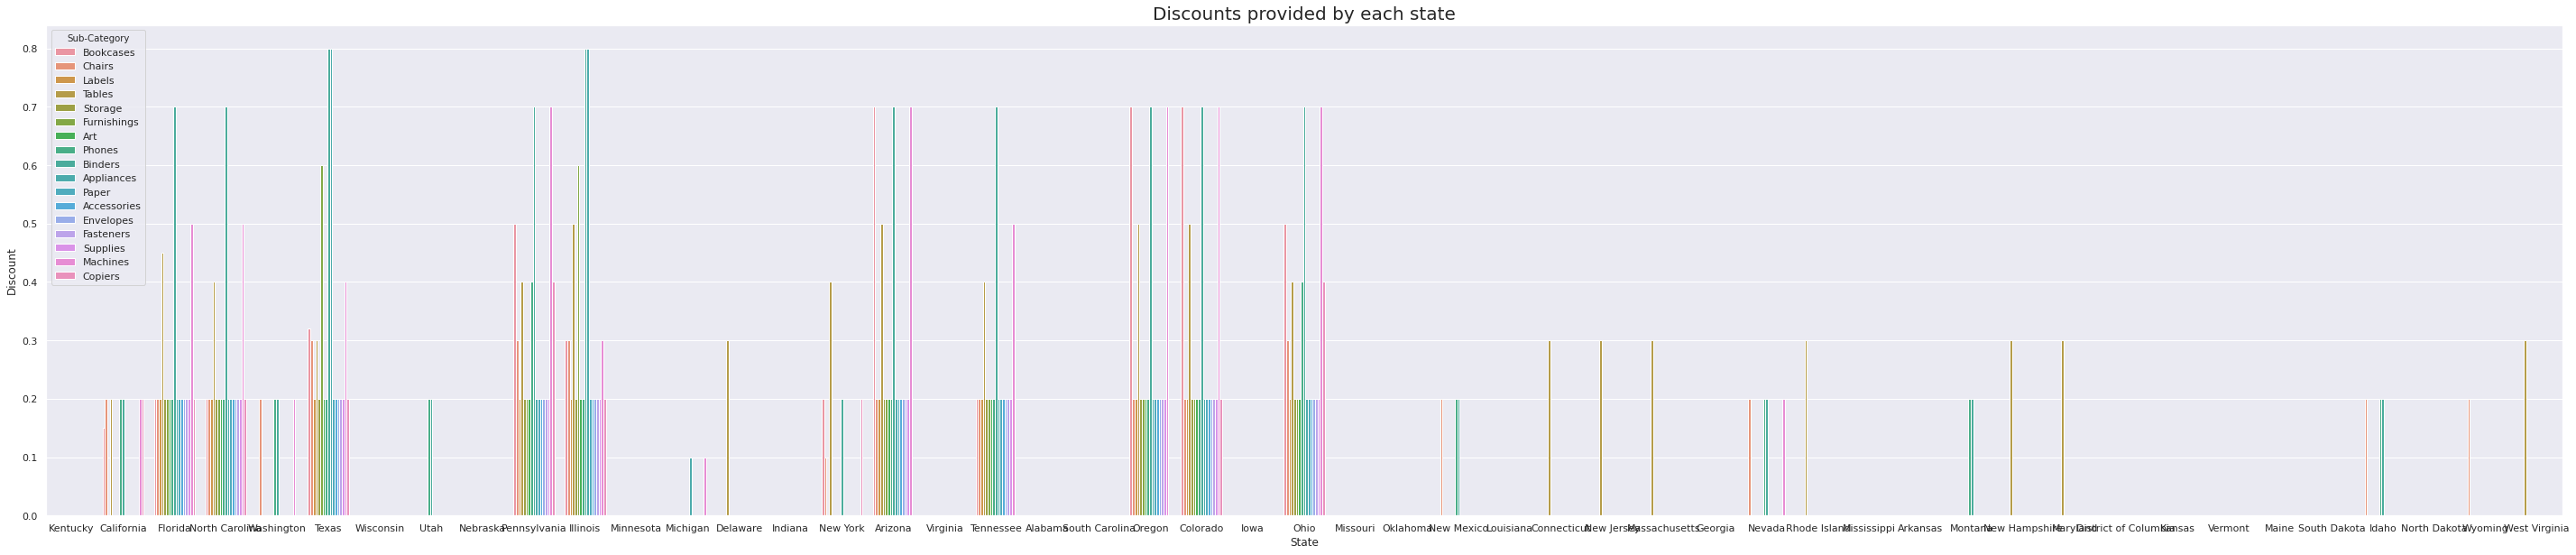

In [79]:
plt.figure(figsize = (50, 10))
sns.set(font_scale=1,)
sns.barplot(data = data , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()


In [ ]:
sns.lineplot(y = 'Sales', x = 'Discount', data = data)

More discount doesn't mean more sales

In [ ]:
sns.lineplot(y = 'Profit', x = 'Discount', data = data)

More discount means less profit.

#### Ship Mode and Sales

In [ ]:
shipping = data.groupby(['Ship Mode'], as_index = False)['Profit'].sum()
sns.barplot(shipping['Ship Mode'], shipping['Profit'])

In [ ]:
a = data.groupby(['Ship Mode'], as_index = False)['Sales'].sum()
sns.barplot(a['Ship Mode'],a['Sales'])

# Conclusion
1. The profits are least in 'Texas', 'Ohio', 'Pennsylvania', 'Illinois', 'North Carolina',
       'Colorado', 'Tennessee', 'Arizona', 'Florida', 'Oregon', 'Wyoming',
       'West Virginia', 'North Dakota', 'South Dakota', 'Maine', 'Idaho',
       'Kansas', 'District of Columbia', 'New Mexico', 'Iowa'
 2. The profits are max in 'California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware', 'New Jersey',
       'Wisconsin', 'Rhode Island', 'Maryland', 'Massachusetts', 'Missouri',
       'Alabama', 'Oklahoma', 'Arkansas', 'Connecticut'
 3. As per the above data The Aberdeen city in Alabama State is at huge loss. As per the above data The Yuma city in     Wyoming State is earning huge profit.
 4. The Company can also try to increase profit by providing same day delivery and by standard class deliveries.
 5. Here, furnitures are the most lost making ventures. Technology sales are low, but profit is very high.
 6. To increase the company revenue it needs to increase more sales for Binders, Papers and Furnishings and need to focus on the products like Copiers, machines to sell these profit-making products.
 7. If the company has to benefit from its sales it need to focus more on the Central Region where they are in loss.
 8.  For enhancing the profits , we need to sell more to the states that favour us and shut down all loss incurring stores in the States.
 9. The discount is abnormally high in some states, particularly loss-making ones.
 
 



## Thank you!